In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
PDF_PATH = "/content/gdrive/MyDrive/LLM/NIPS-2017-attention-is-all-you-need-Paper.pdf"

In [ ]:
!pip install langchain pypdf faiss tiktoken openai typing_extensions --quiet
!pip install huggingface_hub transformers sentence_transformers --quiet


In [35]:
from langchain_community.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

loader = PyPDFLoader(PDF_PATH)

all_pages = loader.load()
raw_text =""
for i in range(len(all_pages)):
  raw_text += all_pages[i].page_content

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=100, chunk_overlap=0
)

chunks = text_splitter.split_text(raw_text)

In [36]:
chunks[0]

'Attention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob Uszkoreit∗\nGoogle Research\nusz@google.com\nLlion Jones∗\nGoogle Research'

In [37]:
import os
import getpass
os.environ['HUGGINGFACEHUB_API_TOKEN'] = getpass.getpass('Huggin Face API Key:')

Huggin Face API Key:··········


In [38]:
# ========== HuggingFace ==========
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
faiss_index = FAISS.from_texts(chunks, HuggingFaceEmbeddings())
# =========== OpenAI ==========
# from langchain.embeddings.openai import OpenAIEmbeddings
# faiss_index = FAISS.from_texts(chunks, OpenAIEmbeddings())
# faiss_index = FAISS.from_texts(chunks, HuggingFaceEmbeddings())

In [41]:
# docs = faiss_index.similarity_search("The encoder is composed of how many layers?")
# ====OR ====
retriever = faiss_index.as_retriever(score_threshold = 0.7)
docs = retriever.get_relevant_documents("Can you describe attention function?")
docs

[Document(page_content='andWO∈Rhdv×dmodel.\nIn this work we employ h= 8 parallel attention layers, or heads. For each of these we use\ndk=dv=dmodel/h= 64 . Due to the reduced dimension of each head, the total computational cost\nis similar to that of single-head attention with full dimensionality.\n3.2.3 Applications of Attention in our Model'),
 Document(page_content='reduced to a constant number of operations, albeit at the cost of reduced effective resolution due\nto averaging attention-weighted positions, an effect we counteract with Multi-Head Attention as\ndescribed in section 3.2.\nSelf-attention, sometimes called intra-attention is an attention mechanism relating different positions\nof a single sequence in order to compute a representation of the sequence. Self-attention has been'),
 Document(page_content='Attention Is All You Need\nAshish Vaswani∗\nGoogle Brain\navaswani@google.comNoam Shazeer∗\nGoogle Brain\nnoam@google.comNiki Parmar∗\nGoogle Research\nnikip@google.comJakob

In [ ]:
from langchain import HuggingFaceHub
from langchain.chains import RetrievalQA
# from langchain.llms import OpenAI

# ========== HuggingFace ==========
llm=HuggingFaceHub(repo_id="TinyLlama/TinyLlama-1.1B-Chat-v1.0",
                  model_kwargs={"temperature":0.4,
                                "max_length":300})
# =========== OpenAI ==========
# from langchain.llms import OpenAI
# llm = OpenAI()

chain = RetrievalQA.from_chain_type(llm=llm,
                                    chain_type="refine",
                                    retriever=retriever,
                                    input_key="query",
                                    return_source_documents=True)

In [58]:
ans = chain("What does the encoder consist of?")

In [61]:
print(ans['result'])


A: The encoder in a Transformer consists of a stack of N= 6 identical layers, where each


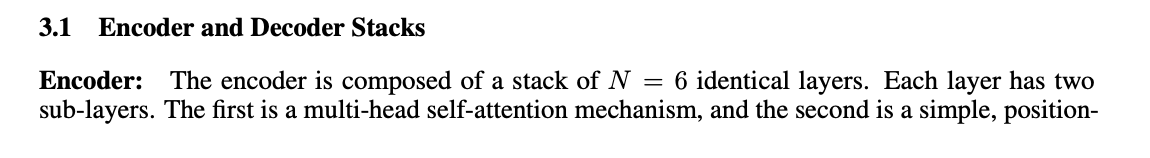